In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

sample1 = pd.read_csv('sample_1.txt')
sample2 = pd.read_csv('sample_2.txt')
sample1 = sample1.values.reshape(-1)
sample2 = sample2.values.reshape(-1)

In [2]:
sample1_mean = 0.5
sample2_mean = 0.75
sample1_std = 1
sample2_std = 0.75

sample1_distribution = np.random.normal(sample1_mean, sample1_std, 1000)
sample2_distribution = np.random.normal(sample2_mean, sample2_std, 1000)

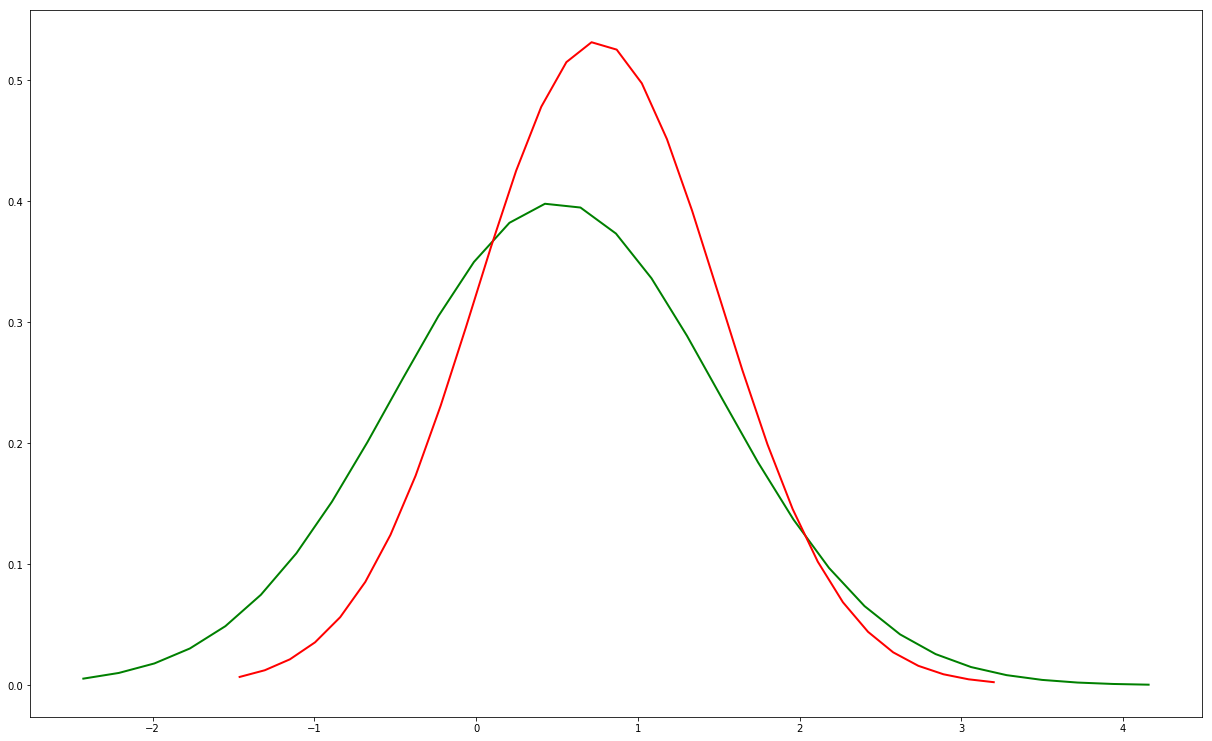

In [3]:
plt.figure(figsize=(21,13))
sample1_count, sample1_bins, sample1_ignored = plt.hist(sample1_distribution, 30, density=True)
sample2_count, sample2_bins, sample2_ignored = plt.hist(sample2_distribution, 30, density=True)
plt.clf()
plt.plot(sample1_bins, 1/(sample1_std * np.sqrt(2 * np.pi)) *
          np.exp( - (sample1_bins - sample1_mean)**2 / (2 * sample1_std**2) ),
          linewidth=2, color='g')
plt.plot(sample2_bins, 1/(sample2_std * np.sqrt(2 * np.pi)) *
          np.exp( - (sample2_bins - sample2_mean)**2 / (2 * sample2_std**2) ),
          linewidth=2, color='r')
plt.show()

In [28]:
# H0: mean1 - mean2 == 0
# https://pl.wikipedia.org/wiki/Test_t_Welcha
mean_sample1 = np.mean(sample1)
mean_sample2 = np.mean(sample2)
var_sample1 = np.var(sample1)
var_sample2 = np.var(sample2)

t = (mean_sample1 - mean_sample2) / math.sqrt(var_sample1**2/len(sample1) + 
                                              var_sample2**2/len(sample2))
v1 = len(sample1) - 1 
v2 = len(sample2) - 1 
v_numerator = pow(var_sample1*var_sample1/len(sample1)+ var_sample2*var_sample2/len(sample2),2)
v_denominator = (pow(var_sample1, 4)/(pow(len(sample1),2)*v1) + pow(var_sample2, 4)/(pow(len(sample2),2)*v2))
v = v_numerator / v_denominator
print("t-statistics: "+str(t))
print("Degrees of Freedom: "+str(v))

t-statistics: -0.9760058948035687
Degrees of Freedom: 125.24426008854367


In [29]:
# https://pythonfordatascience.org/welch-t-test-python-pandas/
def welch_dof(x,y):
        dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
        print(f"Welch-Satterthwaite Degrees of Freedom = {dof:.4f}")
        
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

welch_ttest(sample1, sample2)


 Welch's t-test= -0.9245 
 p-value = 0.3567 
 Welch-Satterthwaite Degrees of Freedom= 154.6535


In [30]:
# Test t-studenta używa się do oszacowania rozkładu prawdopodobieństwa wartości średniej w populacji na podstawie próby.
# Poziom istotności v równa się ilość elementów w próbie - 1. https://en.m.wikipedia.org/wiki/File:Student_t_pdf.svg
# Po co obliczyłem t?
# Na podstawie rozkładu studenta z wyliczonym parametrem v, muszę obliczyć jakie jest prawdopodobieństwo 
# że liczba wylosowana z tego rozkładu jest mniejsza od t lub większa od -t(two tailed test)
# https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means
# na podstawie wartości t i v wylicza się p-value, co dla 0.05 poziomu istotności pozwala nam nie odrzucić hipotezy zerowej


In [ ]:
sample1_distribution = np.random.normal(sample1_mean, sample1_std, 1000)
sample2_distribution = np.random.normal(sample2_mean, sample2_std, 1000)